In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
CATEGORIES = ["Dog", "Cat"]

def prepare(filepath):
    IMG_SIZE = 50 # Image size must be the same as the one used while creating test images and training the model
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # return the image with shaping that TF wants.

model = tf.keras.models.load_model("64x3-CNN.model") # Loading the prepared model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(1, 50, 50, 1)
(50, 50)
Dog


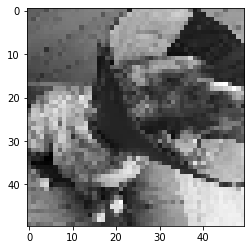

In [3]:
# In the training data 0-Dog and 1-Cat
image = prepare("DogCatModelTestImages/dog.jpg")
print(image.shape)
image = image.squeeze()
print(image.shape)
# Squeeze gets rid of the extra dimension
# before using it, the array shape:(1, 50, 50, 1), after using it:(50, 50) we need a 2D array for grayscale image
prediction = model.predict([prepare("DogCatModelTestImages/dog.jpg")])
print(CATEGORIES[int(prediction[0][0])])
plt.imshow(prepare("DogCatModelTestImages/dog.jpg").squeeze(), cmap='gray')
plt.show()

Dog


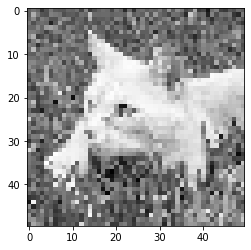

In [4]:
prediction = model.predict([prepare("DogCatModelTestImages/cat.jpg")])
print(CATEGORIES[int(prediction[0][0])])
plt.imshow(prepare("DogCatModelTestImages/cat.jpg").squeeze(), cmap='gray')
plt.show()

Cat


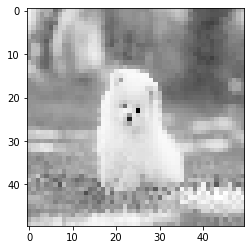

In [5]:
prediction = model.predict([prepare("DogCatModelTestImages/dog(1).jpg")])
print(CATEGORIES[int(prediction[0][0])])
plt.imshow(prepare("DogCatModelTestImages/dog(1).jpg").squeeze(), cmap='gray')
plt.show()

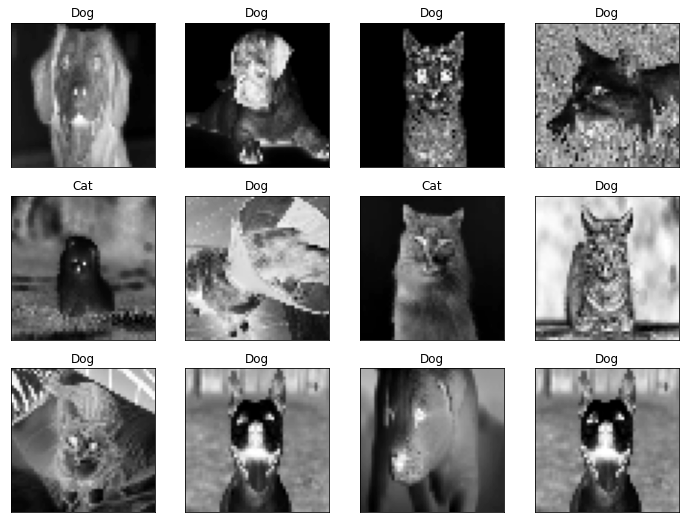

In [6]:
# Printing the predictions for test images alongside resized grayscale images

fig = plt.figure(figsize=(12, 9))

MODEL_TEST_DIR = "DogCatModelTestImages"
IMG_SIZE = 50

i=1

for img in os.listdir(MODEL_TEST_DIR):
    img_array = prepare(os.path.join(MODEL_TEST_DIR, img))
    prediction = model.predict([img_array])
    g = fig.add_subplot(3, 4, i)
    g.imshow(img_array.squeeze(), cmap=plt.cm.binary) # Squeeze gets rid of the extra dimension
    # before using it, the array shape:(1, 50, 50, 1), after using it:(50, 50) we need a 2D array for grayscale image
    plt.title(CATEGORIES[int(prediction[0][0])])
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)
    i += 1
    
plt.show()

In [7]:
# Tutorial article link: https://pythonprogramming.net/using-trained-model-deep-learning-python-tensorflow-keras/
# Video Link: https://www.youtube.com/watch?v=A4K6D_gx2Iw